In [3]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib as mp
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Import csv of blinks as a dataframe

df = pd.read_csv('StatBlinks_df_all.csv')

In [4]:
# Defining functions


# Collects the blinks from the dataframe for the subjectID input as an int
# Returns a dictionary with the key as the condition and chorus with the
# val as a list of blinks for the 11 trials

def collectBlinks(subjectID):

    subject = df.loc[df['subjectID'] == subjectID]

    # Grouping by condition to collect lists of blinks
    grouped = subject.groupby('description')
    set = {}

    for name, group in grouped:
        a = (group['blinks'].to_list())
        set[name] = a
    
    return set


# Runs statistical analysis with student's t. Compares each condition to all others.
# Creates an array for storing the pval results.
# (dictionary input, alpha level int, boneferroni boolean)

def StatArray(set, alpha):

    ArrayStat = np.empty([8,8], dtype = float)

    # Conducting two-tailed t test as the null hypothesis is that there is difference between the distributions
    # Each distribution will be compared against all other distributions, including itself
    rowi = 0
    for row in set:

        coli = 0
        pList = []
        for col in set:

            t_statistic, p_value = ttest_ind(set[row], set[col])
            # ArrayStat[rowi, coli] = p_value
            pList.append(p_value)
            
            coli += 1

        p_corrected = multipletests(pList,alpha,method='bonferroni')
        # print(p_corrected[1])
        # print(pList)
        ArrayStat[rowi] = p_corrected[1]
        rowi += 1

    return ArrayStat
    


def SaveStatArray(StatArray, name):
    # Converting StatArray to a dataframe for easy analysis
    df = pd.DataFrame(StatArray)

    # Rename columns and rows for easy analysis
    df.rename(columns={0: 'Imagerychor019', 1: 'Imagerychor038', 2: 'Imagerychor096', 3: 'Imagerychor101',
                4: 'Listeningchor019', 5: 'Listeningchor038', 6: 'Listeningchor096', 7: 'Listeningchor101'}, inplace=True)

    df.rename(columns={0: 'Imagerychor019', 1: 'Imagerychor038', 2: 'Imagerychor096', 3: 'Imagerychor101',
                4: 'Listeningchor019', 5: 'Listeningchor038', 6: 'Listeningchor096', 7: 'Listeningchor101'}, inplace=True)

    # Save to Excel
    df.to_excel('StatBlinks' + name + '.xlsx', index=False)


In [22]:
subjectID = 1
a = collectBlinks(subjectID)

print(a)

{'Imagery/chor-019': [3, 5, 3, 5, 5, 3, 3, 4, 6, 0, 4], 'Imagery/chor-038': [5, 13, 7, 8, 6, 10, 10, 5, 9, 8, 12], 'Imagery/chor-096': [3, 4, 6, 6, 6, 5, 7, 7, 9, 7, 9], 'Imagery/chor-101': [4, 7, 5, 5, 7, 5, 5, 4, 8, 6, 7], 'Listening/chor-019': [3, 6, 7, 5, 6, 3, 6, 4, 11, 9, 7], 'Listening/chor-038': [8, 6, 4, 10, 5, 8, 6, 7, 10, 6, 13], 'Listening/chor-096': [9, 4, 8, 5, 7, 5, 7, 5, 11, 13, 8], 'Listening/chor-101': [4, 5, 9, 6, 9, 10, 7, 7, 7, 6, 8]}


In [29]:
alpha = 0.05
b = StatArray(a, alpha)

print(b)

[[1.00000000e+00 5.05677049e-04 2.09107219e-02 4.03758026e-02
  1.13298384e-01 4.34611546e-03 7.92506007e-03 1.42174600e-03]
 [5.05677049e-04 1.00000000e+00 2.96414471e-01 5.24839547e-02
  3.32859868e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.09107219e-02 2.96414471e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [4.03758026e-02 5.24839547e-02 1.00000000e+00 1.00000000e+00
  1.00000000e+00 4.33478192e-01 6.21814572e-01 4.73298246e-01]
 [1.13298384e-01 3.32859868e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [4.34611546e-03 1.00000000e+00 1.00000000e+00 4.33478192e-01
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [7.92506007e-03 1.00000000e+00 1.00000000e+00 6.21814572e-01
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.42174600e-03 1.00000000e+00 1.00000000e+00 4.73298246e-01
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]]

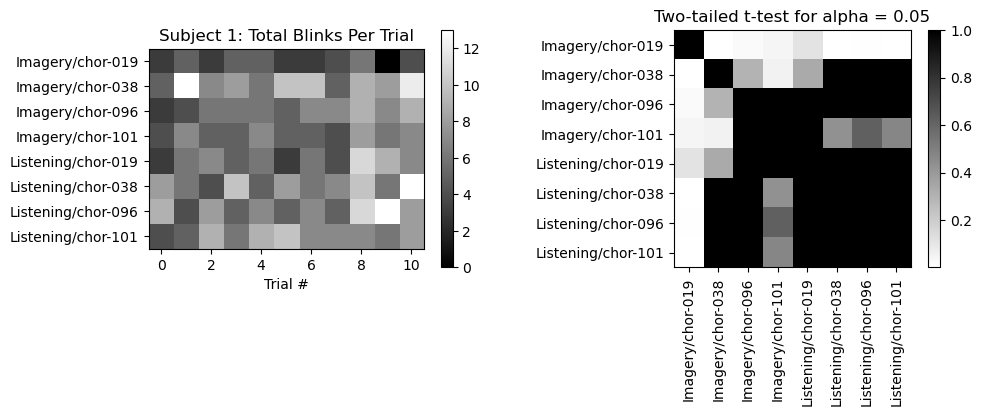

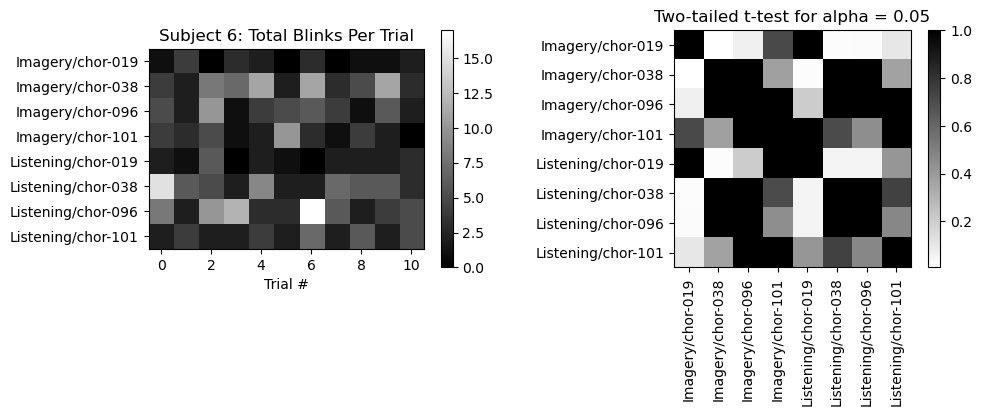

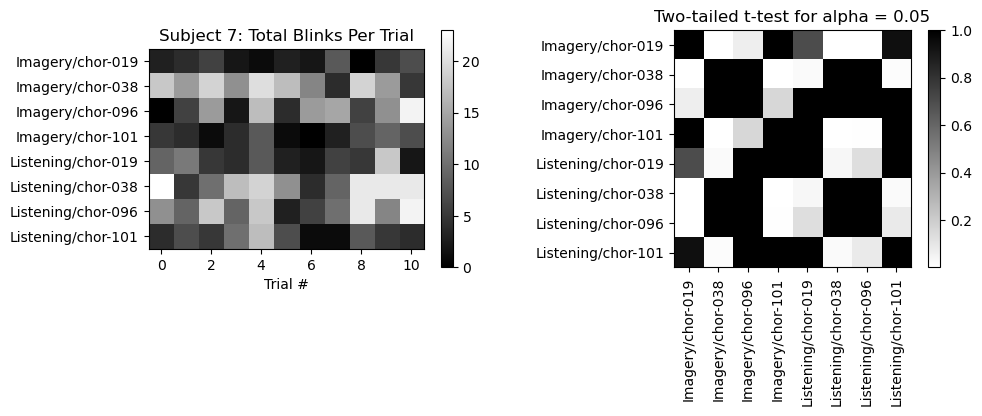

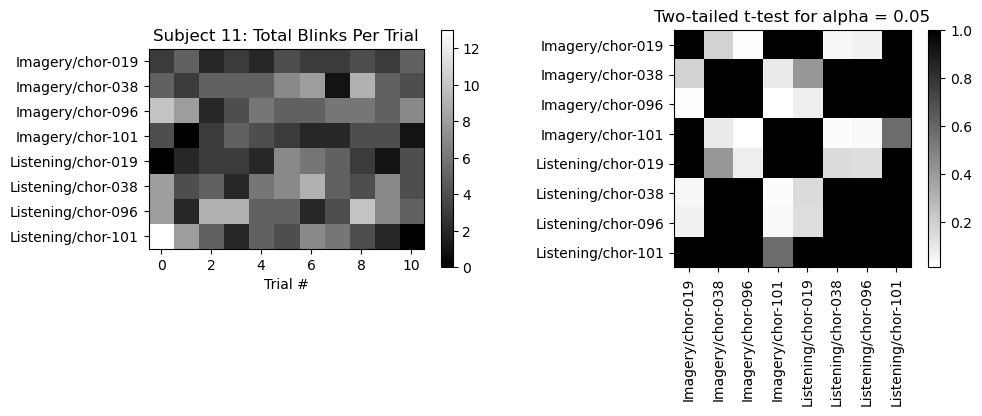

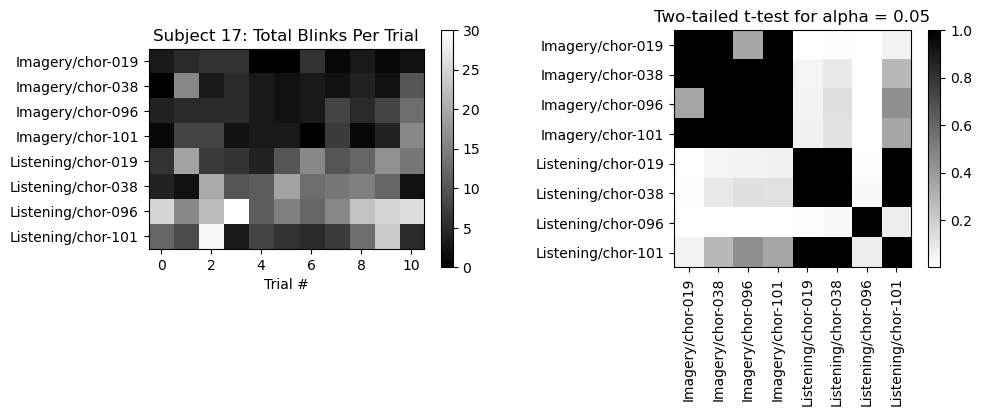

In [59]:
import matplotlib.pyplot as plt

alpha = 0.05
for subjectID in [1, 6, 7, 11, 17]: 
    a = collectBlinks(subjectID)
    b = StatArray(a, alpha)

    # Combine a's entries into an array
    arr = []
    labels = []
    for cond_chor in a:
        arr.append(a[cond_chor])
        labels.append(cond_chor)

    # Plot the array of total blink counts by condition\trial
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)

    plt.imshow(arr, cmap='gray')
    plt.yticks(
        ticks = range(len(a)),
        labels = labels,
    )
    plt.colorbar()
    plt.title(f'Subject {subjectID}: Total Blinks Per Trial')
    plt.xlabel('Trial #')

    # Also plot the significance from paired t-tests
    plt.subplot(1, 2, 2)
    plt.imshow(
        b,
        cmap = 'binary',
    )
    plt.colorbar()

    plt.title(f'Two-tailed t-test for alpha = {alpha}')
    plt.xticks(
        ticks = range(len(a)),
        labels = labels,
        rotation = 90,
    )
    plt.yticks(
        ticks = range(len(a)),
        labels = labels,
    )

    plt.tight_layout()
    plt.show()

In [85]:
SaveStatArray(b, 'subject1')